# Synchrotron Polarization For Leptons

An initial support for leptonic synchrotro polarization has been introduced. A standard interface, as for the other emitted components, will be introduced in the next release.
For the time being you can use the code below to evaluate the polarization for a given electron distribution for a ``nu_range`` range of frequencies

In [1]:
def asymp_sync_pol(p):
    """
    polarization expected for a pure powerlaw
    see Rybicki & Lightman
    """
    return (p+1)/(p+7/3)


In [2]:
from jetset.jet_model import Jet
import numpy as np

import matplotlib.pyplot as plt
from jetset.plot_sedfit import PlotSED
jet=Jet(name='test',electron_distribution='pl')
jet.spectral_components.SSC.state='off'

===> setting C threads to 12


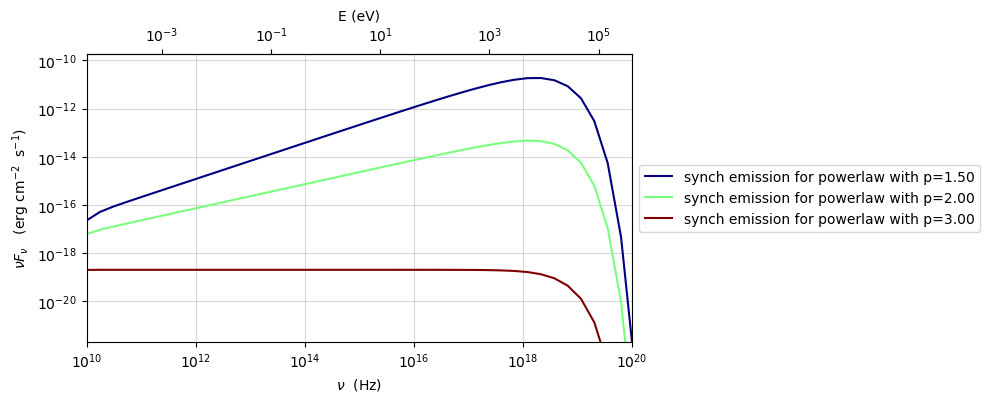

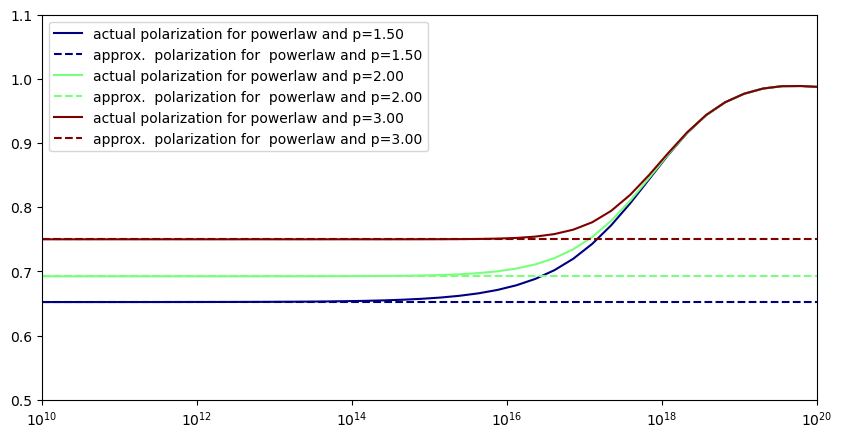

In [3]:
sed_plot=PlotSED(figsize=(10,5))
sed_plot.fig.delaxes(sed_plot.resplot)
f,ax=plt.subplots(1,1,figsize=(10,5))
nu_range=np.logspace(10,22,50)
p_nu=np.zeros(nu_range.size)
plot_obj=None
colors = plt.cm.jet.reversed()(np.linspace(1,0,3))

for ID_c,p in enumerate([1.5,2,3]):
    jet.parameters.p.val=p
    jet.parameters.gmin.val=1
    p_nu,nuF_nu=jet.eval_synch_pol(nu_range)
    sed_plot.add_xy_plot(nu_range,nuF_nu,color=colors[ID_c],label='synch emission for powerlaw with p=%2.2f'%p)
    ax.semilogx(nu_range,p_nu,c=colors[ID_c],label='actual polarization for powerlaw and p=%2.2f'%p)
    ax.axhline(asymp_sync_pol(p),ls='--',label='approx.  polarization for  powerlaw and p=%2.2f'%p,c=colors[ID_c])
ax.legend()
ax.set_xlim(1E10,1E20)
ax.set_ylim(0.5,1.1)
sed_plot.setlim(x_min=1E10,x_max=1E20)

In [4]:
from jetset.jet_model import Jet
import numpy as np

import matplotlib.pyplot as plt
from jetset.plot_sedfit import PlotSED
jet=Jet(name='test',electron_distribution='plc')
jet.spectral_components.SSC.state='off'

===> setting C threads to 12


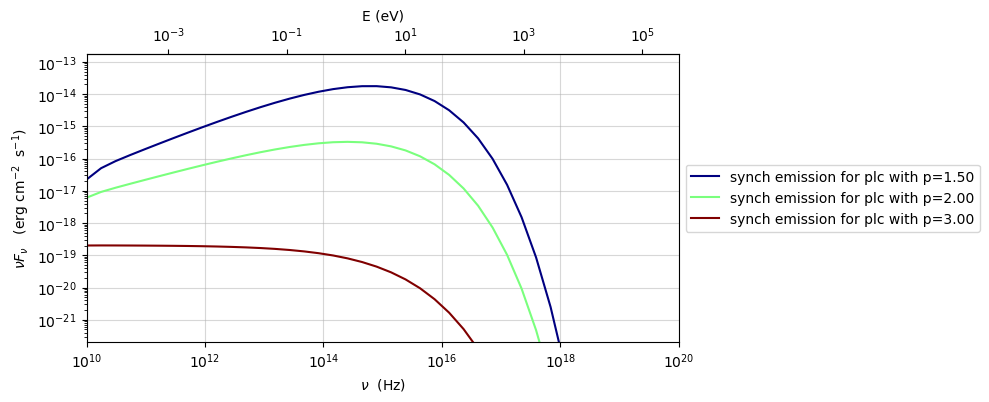

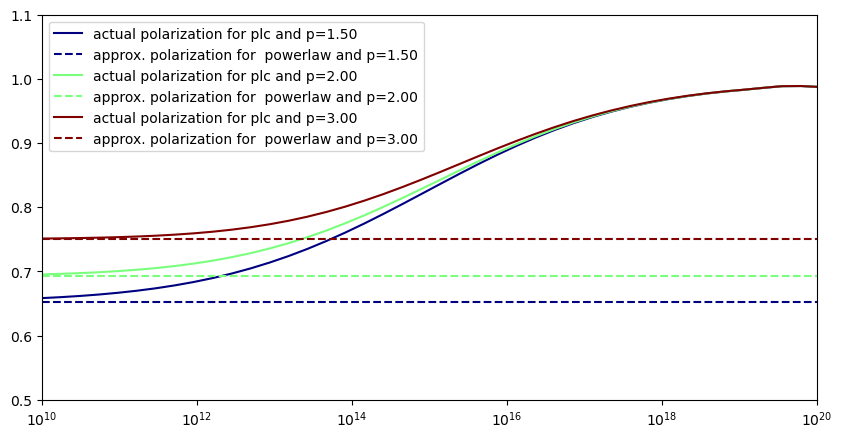

In [5]:
sed_plot=PlotSED(figsize=(10,5))
sed_plot.fig.delaxes(sed_plot.resplot)
f,ax=plt.subplots(1,1,figsize=(10,5))
nu_range=np.logspace(10,22,50)
p_nu=np.zeros(nu_range.size)
plot_obj=None
colors = plt.cm.jet.reversed()(np.linspace(1,0,3))

for ID_c,p in enumerate([1.5,2,3]):
    jet.parameters.p.val=p
    jet.parameters.gmin.val=1
    p_nu,nuF_nu=jet.eval_synch_pol(nu_range)
    sed_plot.add_xy_plot(nu_range,nuF_nu,color=colors[ID_c],label='synch emission for plc with p=%2.2f'%p)
    ax.semilogx(nu_range,p_nu,c=colors[ID_c],label='actual polarization for plc and p=%2.2f'%p)
    ax.axhline(asymp_sync_pol(p),ls='--',label='approx. polarization for  powerlaw and p=%2.2f'%p,c=colors[ID_c])
ax.legend()
ax.set_xlim(1E10,1E20)
ax.set_ylim(0.5,1.1)
sed_plot.setlim(x_min=1E10,x_max=1E20)